# Global Power Plant Database

### Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [118]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import power_transform
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Predictions needs to be done for primary_fuel and capacity_mw Column.

primary_fuel column data is categorical datatype

capacity_mw column data is Continous datatype. 

As per my analysis, need to build Classification and Regression Models seperately for primary_fuel and capacity_mw target variable

Apart from this, rest of data set is a combination of Categorical and Continous datatypes

In [3]:
df.shape

(908, 25)

There are 908 Rows and 25 Columns including the Target variables in this Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can observe the columns datatype and null values info.

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can observe many columns data set has null/ missing values. Need to obtain the percentage of null values and decide whether to drop those null values or correct the null values

908 is total rows count, 50% of this count is 454, we can clearly observe below columns are having null values greater than 50%.

so these columns will be dropped.

1. other_fuel1

2. other_fuel2

3. other_fuel3

4. owner

5. wepp_id

6. generation_gwh_2013

7. generation_gwh_2014

8. generation_gwh_2015

9. generation_gwh_2016

10. generation_gwh_2017

11. generation_data_source

12. estimated_generation_gwh

In [6]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

As discussed above, dropped the concerned columns

In [7]:
df.shape

(908, 13)

We can observe 12 Columns decrement due to the dropping

### Checking for any Unique Set of Values/ Elements in all Columns

In [8]:
df.nunique()

country                    1
country_long               1
name                     908
gppd_idnr                908
capacity_mw              365
latitude                 837
longitude                828
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

1. Country, country_long and year_of_capacity_data column data has only one data for entire set; So we can conclude that dropping these columns would be effective for the model building since these columns will not affect the target variables much.


2. geolocation_source, primarry_fuel columns data has a fixed set of datas.


3. name, gppd_idnr have unique 908 values so it doesnt affect the target variables. Also url is not related to target variables since it is only a web document corresponding to the source field. So it would be best to drop these columns for better model prediction

In [9]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

As discussed dropping the columns which doesnt contribute for prediction

In [10]:
df.shape

(908, 7)

we can confirm 6 columns is dropped

### Resolving Null Values

In [11]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

There are null/ missing values in below listed columns

1. latitude

2. longitude

3. commissioning_year

4. geolocation_source

These null values need to corrected

We can observe 3 columns are object and remaining 4 columns are float data type

In [12]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

Updating the Null Values in Categorical Columns with Mode

In [13]:
df['latitude'].fillna(df['latitude'].median(), inplace=True)
df['longitude'].fillna(df['longitude'].median(), inplace=True)

Updating the Null Values in Continous Columns with Median

In [14]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

All the Null/ Missing Values in the dataset are resolved

### Analyzing the relationship between independent variable and dependent Variable

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

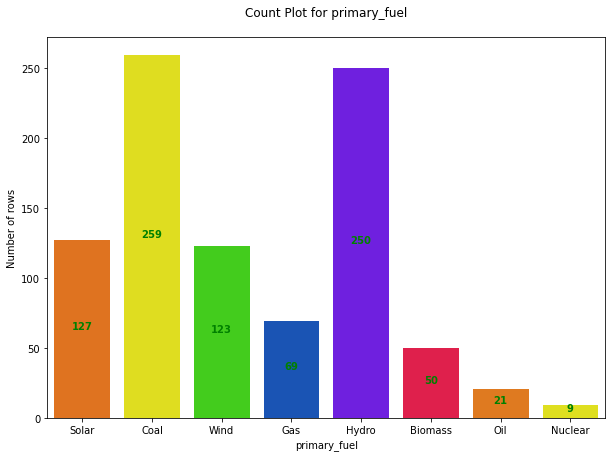

In [15]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='g')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above plot, we can observe that

1. Coal is having higher value for primary_fuel target variable followed by hydro and solar.

2. Nuclear has the least value for primary_fuel target variable

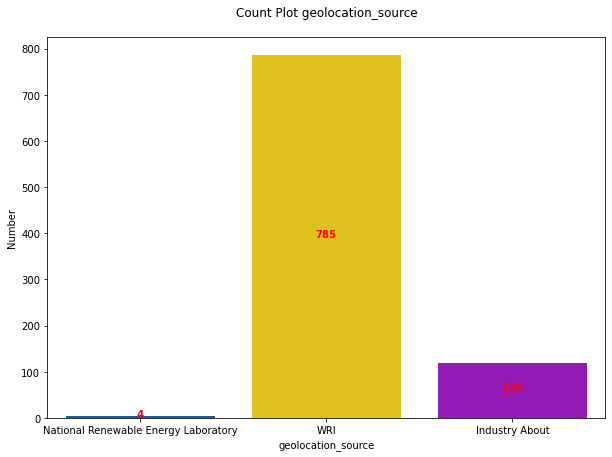

In [16]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='r')
        index += 1
    
    plt.title(f"Count Plot {col_name}\n")
    plt.ylabel(f"Number")
    plt.show()
    
except Exception as e:
    pass

From the above plot, we can observe that

WRI is having higher value for geolocation_source and National Renewable Energy Laboratory is having least value

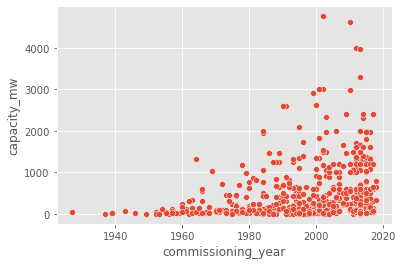

In [17]:
plt.style.use('ggplot')
sns.scatterplot(x="commissioning_year", y="capacity_mw", data=df)
plt.show()

We can observe that power generation capacity has been increased tremendously in recent years compared to previous years

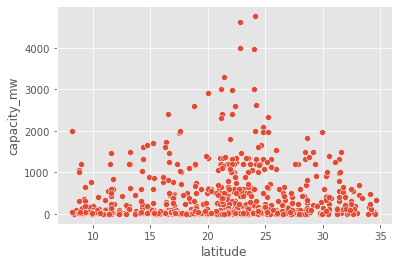

In [18]:
sns.scatterplot(x="latitude", y="capacity_mw", data=df)
plt.show()

We can observe that for latitude range 20 to 25 we have higher power generation capacity

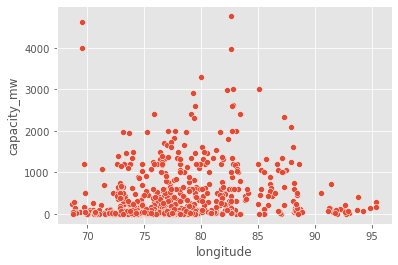

In [19]:
sns.scatterplot(x="longitude", y="capacity_mw", data=df)
plt.show()

We can observe that for longitude range 80 to 85 we have higher power generation capacity

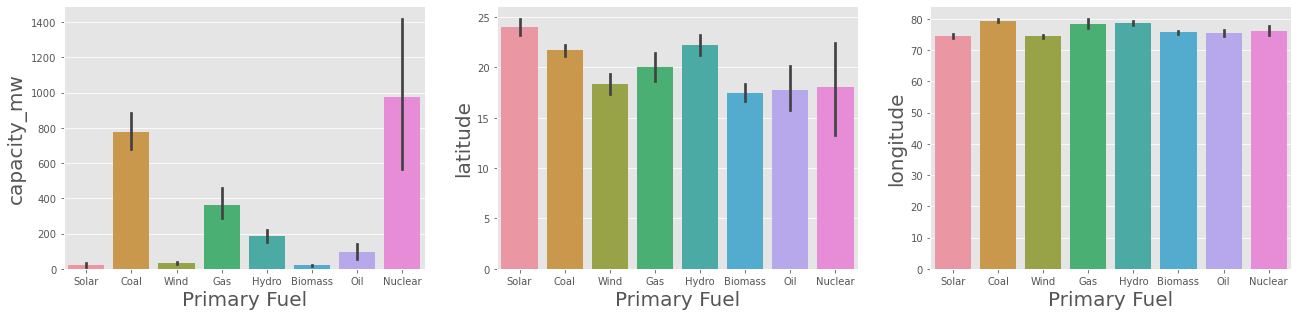

In [20]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['capacity_mw','latitude','longitude']]
y_plot = df['primary_fuel']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Primary Fuel',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

From above plot, we have following observations,

1. Nuclear has high value with respect to primary fuel used and capacity.

2. Solar has high value with respect to primary fuel used and latitude

3. Coal has high value with respect to primary fuel used and longitude

### Encoding the Categorical Data using Label Encoder

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            908 non-null    float64
 2   longitude           908 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  908 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  908 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


In [22]:
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df['source'] = le.fit_transform(df['source'])

In [23]:
df.shape

(908, 7)

Crosschecking whether same Data Shape is retained. Same Data shape is retained

In [24]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2013.0,174,2
2,39.2,21.9038,69.3732,7,2013.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2
904,3.0,12.8932,78.1654,6,2013.0,77,0
905,25.5,15.2758,75.5811,7,2013.0,21,2
906,80.0,24.3500,73.7477,1,2013.0,59,2


Crosschecking whether categorical data is encoded or not. It can be confirmed that encoding is done correctly

In [25]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.225679,77.410936,3.205947,2003.624449,43.823789,1.733480
std,580.221767,6.089450,4.783873,2.281339,15.238021,44.624092,0.676835
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,1997.000000,22.000000,2.000000
50%,60.000000,21.778300,76.719250,3.000000,2013.000000,22.000000,2.000000
75%,388.125000,25.183775,79.211600,6.000000,2013.000000,29.250000,2.000000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,2.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            908 non-null    float64
 2   longitude           908 non-null    float64
 3   primary_fuel        908 non-null    int32  
 4   commissioning_year  908 non-null    float64
 5   source              908 non-null    int32  
 6   geolocation_source  908 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 39.1 KB


Analyzing the changes in dataset after encoding. All values are numdericals now.

### Checking Correlation between each columns data

In [27]:
corr_mat=df.corr()
corr_mat

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.047608,0.200473,-0.377783,0.012518,-0.241701,0.204698
latitude,0.047608,1.000000,0.030775,-0.010793,0.034731,0.054346,-0.182049
longitude,0.200473,0.030775,1.000000,-0.352749,-0.144785,-0.236349,0.249233
primary_fuel,-0.377783,-0.010793,-0.352749,1.000000,0.145487,0.053609,-0.482803
commissioning_year,0.012518,0.034731,-0.144785,0.145487,1.000000,0.301660,-0.242439
source,-0.241701,0.054346,-0.236349,0.053609,0.301660,1.000000,-0.505823
geolocation_source,0.204698,-0.182049,0.249233,-0.482803,-0.242439,-0.505823,1.000000


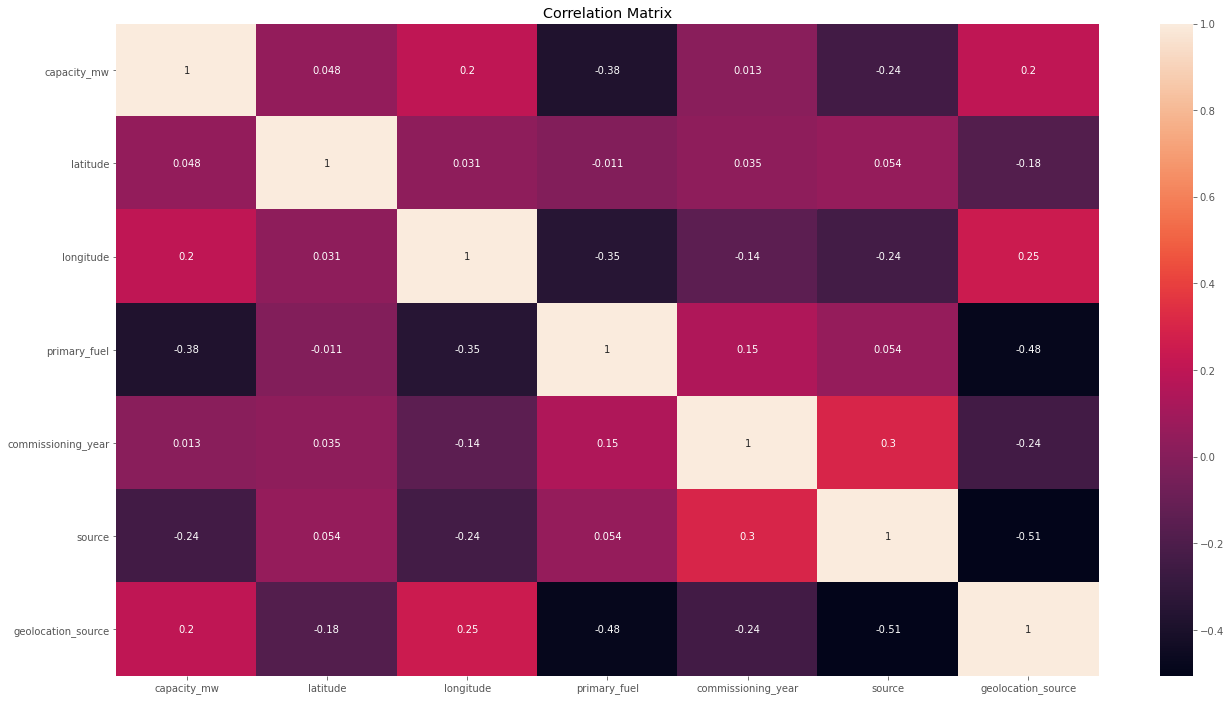

In [28]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

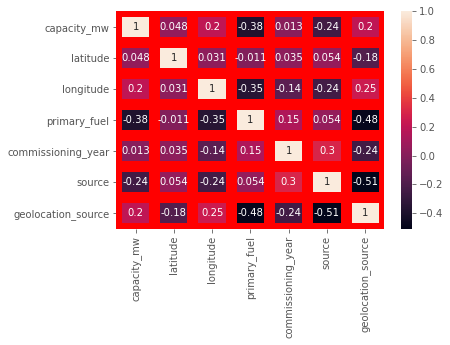

In [29]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

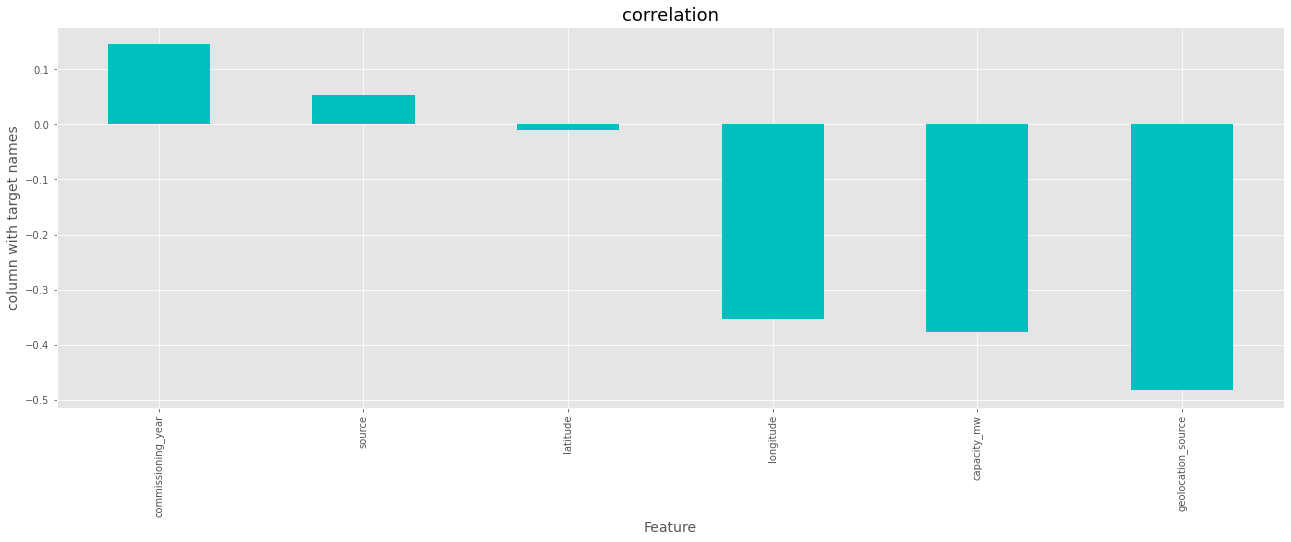

In [30]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [31]:
corr_mat["primary_fuel"].sort_values(ascending=False)

primary_fuel          1.000000
commissioning_year    0.145487
source                0.053609
latitude             -0.010793
longitude            -0.352749
capacity_mw          -0.377783
geolocation_source   -0.482803
Name: primary_fuel, dtype: float64

Using Heatmap, Correlation Matrix we can conclude below observations for Target Variable primary_fuel


1. commissioning_year is positively correlated with primary_fuel Column data (in Positive Correlation Descending Order) reasonably


2. geolocation_source, capacity_mw, longitude are negatively correlated with primary_fuel Column data (in Negative Correlation Descending Order)


3. latitude, source column data has very less correlation with primary_fuel Column Data. If the Model Accuracy is less, these columns can be dropped because of very less correlationship with Target Variable

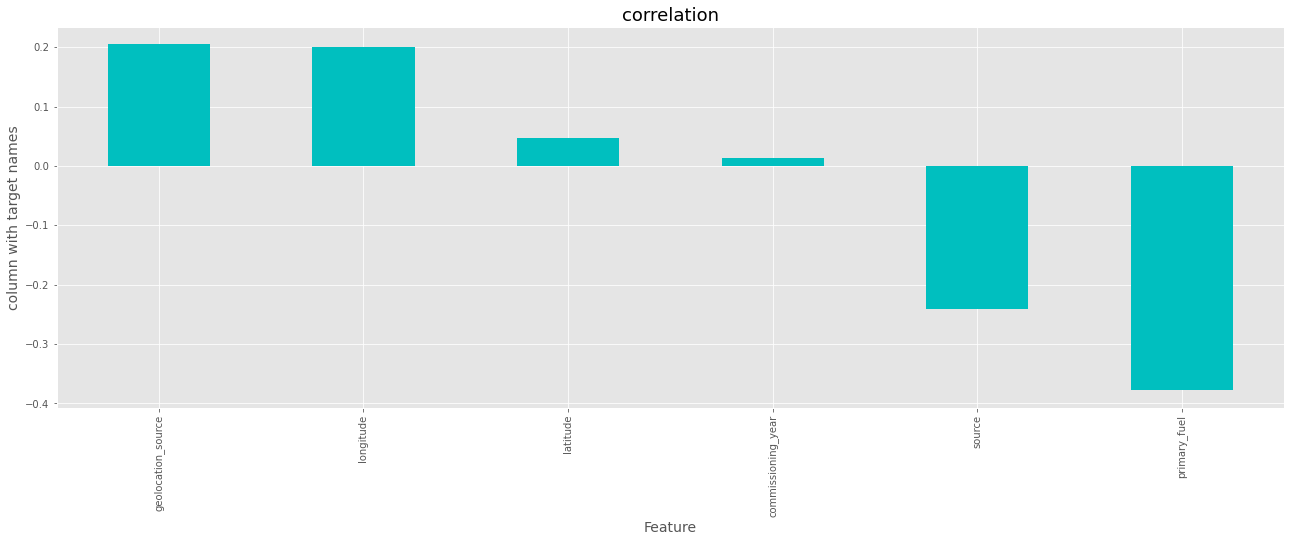

In [32]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [33]:
corr_mat["capacity_mw"].sort_values(ascending=False)

capacity_mw           1.000000
geolocation_source    0.204698
longitude             0.200473
latitude              0.047608
commissioning_year    0.012518
source               -0.241701
primary_fuel         -0.377783
Name: capacity_mw, dtype: float64

Using Heatmap, Correlation Matrix we can conclude below observations for Target Variable capacity_mw


1. geolocation_source, longitude are positively correlated with capacity_mw Column data (in Positive Correlation Descending Order) reasonably


2. primary_fuel, source are negatively correlated with capacity_mw Column data (in Negative Correlation Descending Order)


3. commissioning_year, latitude column data has very less correlation with capacity_mw Column Data. If the Model Accuracy is less, these columns can be dropped because of very less correlationship with Target Variable

### Checking for Outliers through boxplots and analyzing each column Outliers 

In [34]:
x1 = df.drop(columns=['primary_fuel']).copy()
y1 = df['primary_fuel'].copy()
x1_outlier=x1.copy()
x1_outlier

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011.0,109,1
1,98.0,24.7663,74.6090,2013.0,174,2
2,39.2,21.9038,69.3732,2013.0,21,2
3,135.0,23.8712,91.3602,2004.0,22,2
4,1800.0,21.9603,82.4091,2015.0,22,2
...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,22,2
904,3.0,12.8932,78.1654,2013.0,77,0
905,25.5,15.2758,75.5811,2013.0,21,2
906,80.0,24.3500,73.7477,2013.0,59,2


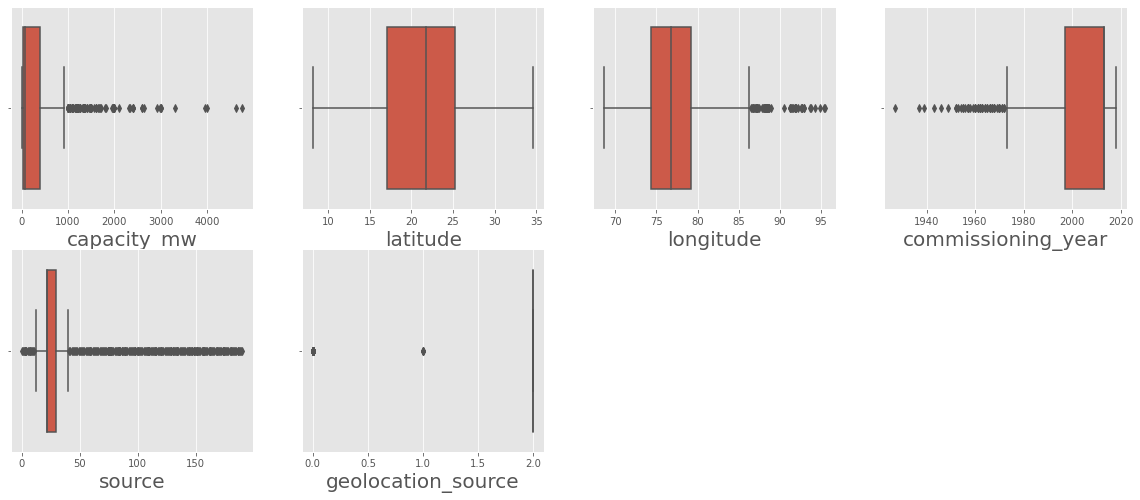

In [35]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x1_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x1_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

For primary_fuel target variable (Classification Problem), we can confirm that there are outliers in capacity_mw, longitude, commissioning_year, source, geolocation_source Column Data

In [36]:
x2 = df.drop(columns=['capacity_mw']).copy()
y2 = df['capacity_mw'].copy()
x2_outlier=x2.copy()
x2_outlier

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,73.2407,6,2011.0,109,1
1,24.7663,74.6090,1,2013.0,174,2
2,21.9038,69.3732,7,2013.0,21,2
3,23.8712,91.3602,2,2004.0,22,2
4,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...
903,16.2949,77.3568,1,2016.0,22,2
904,12.8932,78.1654,6,2013.0,77,0
905,15.2758,75.5811,7,2013.0,21,2
906,24.3500,73.7477,1,2013.0,59,2


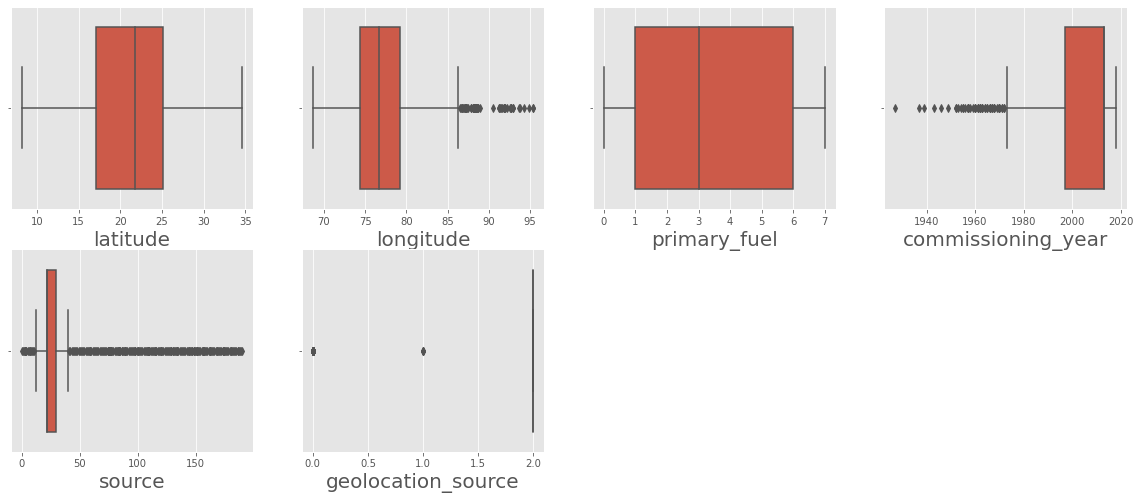

In [37]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x2_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x2_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

For capacity_mw target variable (Regression Problem), we can confirm that there are outliers in longitude, commissioning_year, source, geolocation_source Column Data

### Outliers Removal

### Classification Problem:

#### Using ZScore Method

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(x1_outlier[['capacity_mw', 'latitude', 'longitude', 'commissioning_year']]))
x_zscore_cl=x1_outlier[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [39]:
x_zscore_cl.shape

(854, 6)

##### Dataset Shape before Outliers removal

In [40]:
x1_outlier.shape

(908, 6)

In [41]:
zscore_data_loss=((908-854)/908)*100
zscore_data_loss

5.947136563876652

Upon analyzing, found 5.94% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set

### Regression Problem:

#### Using ZScore Method

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(x2_outlier[['latitude', 'longitude', 'commissioning_year']]))
x_zscore_rg=x2_outlier[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [43]:
x_zscore_rg.shape

(872, 6)

##### Dataset Shape before Outliers removal

In [44]:
x2_outlier.shape

(908, 6)

In [45]:
zscore_data_loss=((908-872)/908)*100
zscore_data_loss

3.9647577092511015

Upon analyzing, found 3.96% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set

#### Analyzing Outliers through Boxplots after using Zscore

### Classification Problem:

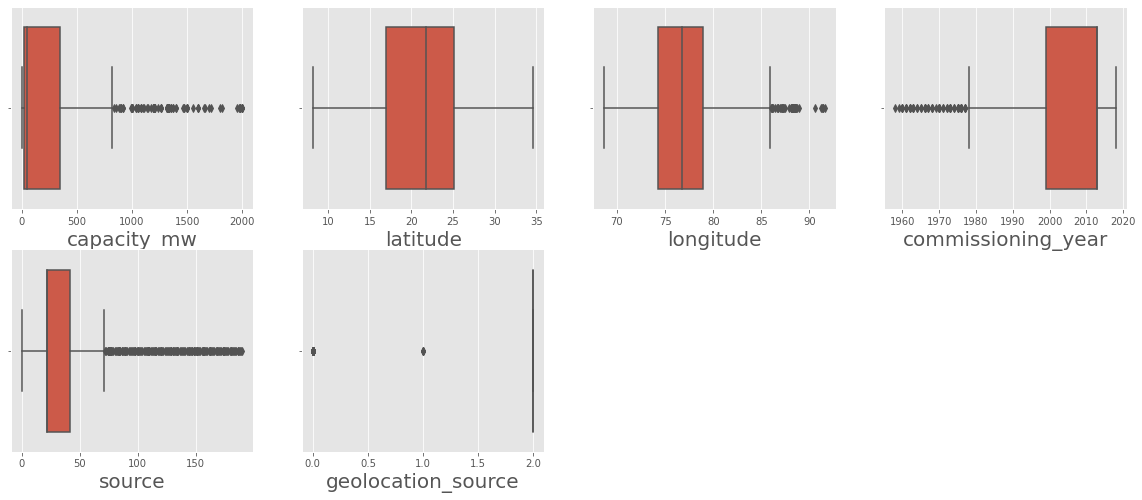

In [46]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore_cl:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore_cl[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

### Regression Problem:

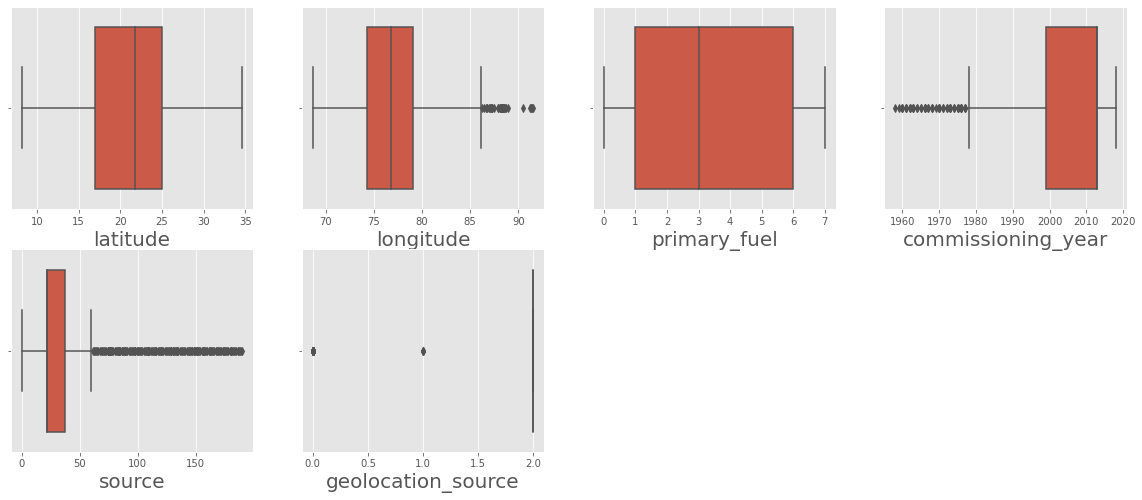

In [47]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore_rg:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore_rg[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers are removed for both type.

### Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [48]:
df_cl=df.copy()
df_rg=df.copy()

### Classification Model:

In [49]:
drop_index = df_cl.index.difference(x_zscore_cl.index)
df_cl.drop(drop_index,inplace = True)
df_cl.reset_index(drop=True,inplace = True)
df_cl.shape

(854, 7)

### Regression Model:

In [50]:
drop_index = df_rg.index.difference(x_zscore_rg.index)
df_rg.drop(drop_index,inplace = True)
df_rg.reset_index(drop=True,inplace = True)
df_rg.shape

(872, 7)

We can observe that Target variable is merged with outlier removed feature data set for both model problem

### Skewness Analysis and Skewness Correction

In [51]:
df_powertransform_cl = df_cl.copy()
df_powertransform_cl

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2013.0,174,2
2,39.2,21.9038,69.3732,7,2013.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...,...
849,1600.0,16.2949,77.3568,1,2016.0,22,2
850,3.0,12.8932,78.1654,6,2013.0,77,0
851,25.5,15.2758,75.5811,7,2013.0,21,2
852,80.0,24.3500,73.7477,1,2013.0,59,2


In [52]:
df_powertransform_rg = df_rg.copy()
df_powertransform_rg

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2013.0,174,2
2,39.2,21.9038,69.3732,7,2013.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...,...
867,1600.0,16.2949,77.3568,1,2016.0,22,2
868,3.0,12.8932,78.1654,6,2013.0,77,0
869,25.5,15.2758,75.5811,7,2013.0,21,2
870,80.0,24.3500,73.7477,1,2013.0,59,2


In [53]:
x1_cl = df_powertransform_cl.drop(columns=['primary_fuel'])
y1_cl = df_powertransform_cl['primary_fuel']
y1_cl.value_counts()

1    241
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [54]:
x1_rg = df_powertransform_rg.drop(columns=['capacity_mw'])
y1_rg = df_powertransform_rg['capacity_mw']
y1_rg.value_counts()

5.00       37
10.00      21
600.00     21
15.00      19
1200.00    19
           ..
702.86      1
272.30      1
4.20        1
91.80       1
2.50        1
Name: capacity_mw, Length: 351, dtype: int64

In [55]:
x1_cl.skew()

capacity_mw           1.991091
latitude             -0.122530
longitude             0.885597
commissioning_year   -1.604869
source                1.739843
geolocation_source   -2.072421
dtype: float64

In [56]:
x2_cl=x1_cl[['capacity_mw', 'latitude', 'longitude', 'commissioning_year']]
x2_cl_skew = power_transform(x2_cl)
x2_cl_skew = pd.DataFrame(x2_cl_skew, columns=x2_cl.columns)
x2_cl_skew.skew()

capacity_mw           0.013405
latitude             -0.073162
longitude            -0.000012
commissioning_year   -1.162985
dtype: float64

We can observe except commissioning_year, all columns are within skewness allowable range of -0.50 to +0.50

In [57]:
x1_rg.skew()

latitude             -0.133094
longitude             0.838352
primary_fuel          0.450137
commissioning_year   -1.606103
source                1.773061
geolocation_source   -2.107415
dtype: float64

In [58]:
x2_rg=x1_rg[['latitude', 'longitude', 'commissioning_year']]
x2_rg_skew = power_transform(x2_rg)
x2_rg_skew = pd.DataFrame(x2_rg_skew, columns=x2_rg.columns)
x2_rg_skew.skew()

latitude             -0.070450
longitude             0.003368
commissioning_year   -1.155576
dtype: float64

We can observe except commissioning_year, all columns are within skewness allowable range of -0.50 to +0.50

#### Analyzing the distribution plots after skewness correction

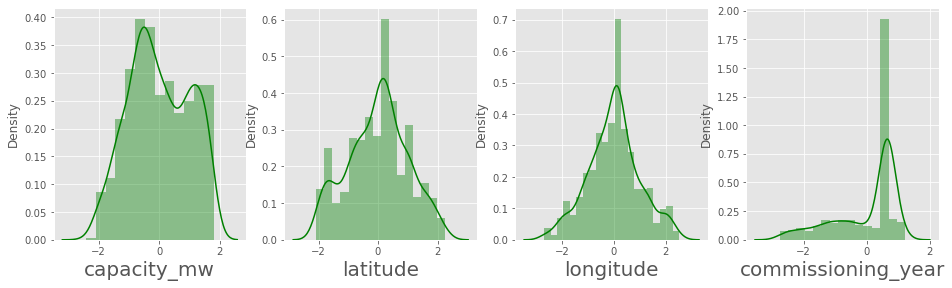

In [59]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x2_cl_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x2_cl_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

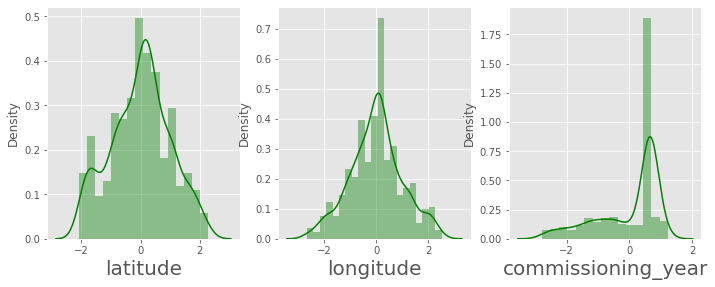

In [60]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x2_rg_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x2_rg_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

### Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

### Classification Problem:

In [61]:
drop_index = df_cl.index.difference(x2_cl_skew.index)
df_cl.drop(drop_index,inplace = True)
df_cl.reset_index(drop=True,inplace = True)
df_cl.shape

(854, 7)

### Regression Problem:

In [62]:
drop_index = df_rg.index.difference(x2_rg_skew.index)
df_rg.drop(drop_index,inplace = True)
df_rg.reset_index(drop=True,inplace = True)
df_rg.shape

(872, 7)

### Feature and Target Selection

In [63]:
x_cl = df_cl.drop(columns=['primary_fuel'])
y_cl = df_cl['primary_fuel']
y_cl.value_counts()

1    241
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [64]:
x_rg = df_rg.drop(columns=['capacity_mw'])
y_rg = df_rg['capacity_mw']
y_rg.value_counts()

5.00       37
10.00      21
600.00     21
15.00      19
1200.00    19
           ..
702.86      1
272.30      1
4.20        1
91.80       1
2.50        1
Name: capacity_mw, Length: 351, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [65]:
sc=StandardScaler()
x_scaled_cl=sc.fit_transform(x_cl)
x_scaled_cl

array([[-0.6302195 ,  1.1526519 , -0.88742986,  0.46047603,  1.40156485,
        -1.03947823],
       [-0.40898845,  0.59445219, -0.56232267,  0.61051286,  2.82727247,
         0.40631071],
       [-0.54520192,  0.12691747, -1.80634533,  0.61051286, -0.52862393,
         0.40631071],
       ...,
       [-0.57693873, -0.95563979, -0.33135235,  0.61051286, -0.52862393,
         0.40631071],
       [-0.45068645,  0.52645753, -0.76696699,  0.61051286,  0.30486668,
         0.40631071],
       [-0.59778773, -1.8280555 ,  0.11906473,  0.61051286, -0.52862393,
         0.40631071]])

In [66]:
sc=StandardScaler()
x_scaled_rg=sc.fit_transform(x_rg)
x_scaled_rg

array([[ 1.15938824, -0.89551633,  1.19864074,  0.46287066,  1.42306144,
        -1.0570513 ],
       [ 0.59623521, -0.57397276, -0.95377838,  0.613899  ,  2.85991342,
         0.40141188],
       [ 0.1245517 , -1.80435924,  1.62912456,  0.613899  , -0.52221508,
         0.40141188],
       ...,
       [-0.9676119 , -0.34553418,  1.62912456,  0.613899  , -0.52221508,
         0.40141188],
       [ 0.52763718, -0.7763739 , -0.95377838,  0.613899  ,  0.31779069,
         0.40141188],
       [-1.84776921,  0.09994572,  1.62912456,  0.613899  , -0.52221508,
         0.40141188]])

### Obtaining Multicollinearity using Variance Inflation Factor

In [67]:
vif_cl = pd.DataFrame().copy()
vif_rg = pd.DataFrame().copy()

In [68]:
vif_cl["Columns"] = x_cl.columns
vif_cl['vif_cl'] = [variance_inflation_factor(x_scaled_cl,i) for i in range(x_scaled_cl.shape[1])]
vif_cl

,Columns,vif_cl
0,capacity_mw,1.166872
1,latitude,1.052600
2,longitude,1.144213
3,commissioning_year,1.125622
4,source,1.465101
5,geolocation_source,1.457637


In [69]:
vif_rg["Columns"] = x_rg.columns
vif_rg['vif_rg'] = [variance_inflation_factor(x_scaled_rg,i) for i in range(x_scaled_rg.shape[1])]
vif_rg

,Columns,vif_rg
0,latitude,1.061512
1,longitude,1.258912
2,primary_fuel,1.645813
3,commissioning_year,1.132741
4,source,1.598034
5,geolocation_source,1.959394


From above set, we can observe that most of the columns have same multicollinearity and VIF. So we couldnt get an idea through so we shall proceed with PCA

### Principle Component Analysis 

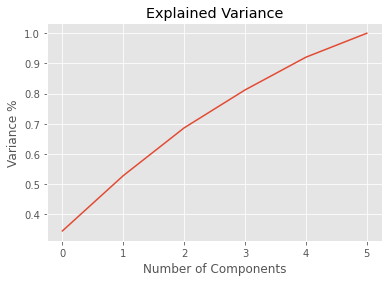

In [70]:
pca_cl = PCA()
principle_components_cl = pca_cl.fit_transform(x_scaled_cl)
plt.figure()
plt.plot(np.cumsum(pca_cl.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [71]:
pca_new_cl = PCA(n_components=6)
new_components_cl = pca_new_cl.fit_transform(x_scaled_cl)
x_principle_cl=pd.DataFrame(new_components_cl,columns=np.arange(6))
x_principle_cl

,0,1,2,3,4,5
0,2.207043,0.581123,0.609101,-0.008761,-0.006724,-0.436332
1,1.967787,0.238437,-0.350308,0.293589,0.015373,-2.286909
2,0.626029,-0.729448,0.400410,-1.690791,-0.670697,0.023421
3,-1.649236,1.160322,-0.567799,2.528064,-1.230942,0.342665
4,-2.018108,2.488914,-1.654689,-0.740215,1.271889,-0.044796
...,...,...,...,...,...,...
849,-1.487168,1.215427,-1.773503,-1.485703,1.461238,0.045522
850,1.848837,-0.502861,-1.062427,1.102387,0.919829,1.568998
851,-0.084412,-1.020636,-0.665539,-0.459762,-0.594181,0.341995
852,0.694564,-0.014967,0.147220,-0.664711,-0.683680,-0.534506


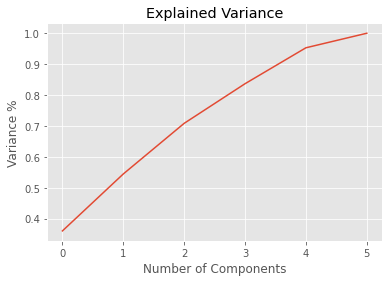

In [72]:
pca_rg = PCA()
principle_components_rg = pca_rg.fit_transform(x_scaled_rg)
plt.figure()
plt.plot(np.cumsum(pca_rg.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [73]:
pca_new_rg = PCA(n_components=6)
new_components_rg = pca_new_rg.fit_transform(x_scaled_rg)
x_principle_rg=pd.DataFrame(new_components_rg,columns=np.arange(6))
x_principle_rg

,0,1,2,3,4,5
0,2.425334,0.370694,0.694712,0.219256,-0.127809,-0.610645
1,1.149231,1.921043,-0.907930,1.445543,-1.093563,-1.091236
2,1.211653,-1.651166,0.360248,-0.793771,-1.261963,-0.434891
3,-1.996000,1.669695,0.180703,-1.123247,1.968111,-0.507254
4,-1.090941,1.116073,-0.397051,-0.900637,0.160096,0.280850
...,...,...,...,...,...,...
867,-0.713309,0.175066,-1.101752,-0.473312,-0.492994,0.671965
868,2.165591,-0.502161,-1.037150,-0.085088,1.977572,0.797923
869,0.470314,-1.570459,-0.602640,-1.060271,0.058727,-0.584884
870,0.097396,0.740025,-0.145838,0.171992,-1.329850,0.231018


For Classification:

We can conclude that for 95% variance, most of the Principle components are contributing. So we have to retain 5 components out of 5 components and build the model


For Regression: 

We can conclude that for 95% variance, nearly 4 Principle components are contributing. So we can retain 4 components out of 5 components and build the model

### Selecting KBest Features

#### Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [76]:
best_features_cl = SelectKBest(score_func = f_classif, k = 6)
best_fit_cl = best_features_cl.fit(x_cl,y_cl)
scores_cl = pd.DataFrame(best_fit_cl.scores_)
columns_cl = pd.DataFrame(x_cl.columns)
columns_cl.head()
featureScores_cl = pd.concat([columns_cl,scores_cl],axis = 1)
featureScores_cl.columns = ['Features', 'Scores']
print(featureScores_cl.nlargest(6,'Scores'))

             Features       Scores
5  geolocation_source  2497.594209
4              source   100.785437
3  commissioning_year    85.623508
0         capacity_mw    59.590795
2           longitude    32.869673
1            latitude    14.808473


In [77]:
best_features_rg = SelectKBest(score_func = f_classif, k = 6)
best_fit_rg = best_features_rg.fit(x_rg,y_rg)
scores_rg = pd.DataFrame(best_fit_rg.scores_)
columns_rg = pd.DataFrame(x_rg.columns)
columns_rg.head()
featureScores_rg = pd.concat([columns_rg,scores_rg],axis = 1)
featureScores_rg.columns = ['Features', 'Scores']
print(featureScores_rg.nlargest(6,'Scores'))

             Features    Scores
5  geolocation_source  3.261779
2        primary_fuel  3.090230
3  commissioning_year  2.028685
1           longitude  1.835201
4              source  1.728765
0            latitude  1.390846


For Classification:

Upon reviewing Best Features Scores, found all columns have reasonable scores so proceeding without dropping any column.

For Regression:

Upon reviewing Best Features Scores, found latitude has least score. Proceeding without dropping the column

In [78]:
x_best_cl = x_cl.copy()

In [79]:
x_best_cl

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011.0,109,1
1,98.0,24.7663,74.6090,2013.0,174,2
2,39.2,21.9038,69.3732,2013.0,21,2
3,135.0,23.8712,91.3602,2004.0,22,2
4,1800.0,21.9603,82.4091,2015.0,22,2
...,...,...,...,...,...,...
849,1600.0,16.2949,77.3568,2016.0,22,2
850,3.0,12.8932,78.1654,2013.0,77,0
851,25.5,15.2758,75.5811,2013.0,21,2
852,80.0,24.3500,73.7477,2013.0,59,2


In [80]:
x_best_rg = x_rg.copy()

In [81]:
x_best_rg

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,73.2407,6,2011.0,109,1
1,24.7663,74.6090,1,2013.0,174,2
2,21.9038,69.3732,7,2013.0,21,2
3,23.8712,91.3602,2,2004.0,22,2
4,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...
867,16.2949,77.3568,1,2016.0,22,2
868,12.8932,78.1654,6,2013.0,77,0
869,15.2758,75.5811,7,2013.0,21,2
870,24.3500,73.7477,1,2013.0,59,2


### Resolving Class Imbalance using Oversampling (SMOTE Technique)

In [82]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over_cl, y_over_cl = Sm.fit_resample(x_best_cl,y_cl)

In [83]:
y_over_cl.value_counts()

7    241
6    241
5    241
4    241
3    241
2    241
1    241
0    241
Name: primary_fuel, dtype: int64

In [84]:
x_cl = sc.fit_transform(x_over_cl)
y_cl = y_over_cl.copy()

In [85]:
x_rg = sc.fit_transform(x_rg)
y_rg = y_rg.copy()

Applying Standard Scaler since scaling will help in better accuracy

## Model Building: Classification Problem

### Finding the Best Random State 

In [86]:
x=x_cl.copy()
y=y_cl.copy()

In [87]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.6989966555183946 on random_state: 5


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [89]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()

#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()

#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()

#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()

#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()

### Random Forest Classifier 

In [90]:
confusion_matrix_rfc

array([[79,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 47,  5,  8,  5,  2,  0,  0],
       [ 0,  4, 56,  0,  1,  2,  0,  0],
       [ 0,  4,  4, 57,  3,  3,  0,  0],
       [ 0,  0,  3,  0, 81,  0,  0,  0],
       [ 0,  0,  4,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

In [91]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       0.85      0.67      0.75        70
           2       0.78      0.89      0.83        63
           3       0.88      0.80      0.84        71
           4       0.90      0.96      0.93        84
           5       0.89      0.94      0.91        63
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        88

    accuracy                           0.91       598
   macro avg       0.91      0.91      0.91       598
weighted avg       0.91      0.91      0.91       598



In [92]:
print(cvs_rfc)

0.8978184509790728


rfc_difference = 91-89.78 = 1.22

### Logistic Regression Model

In [93]:
confusion_matrix_lrc

array([[65,  0,  0,  0,  0,  0,  0, 14],
       [10, 33,  4,  4,  9,  1,  0,  9],
       [ 5, 22,  6, 10,  8,  4,  0,  8],
       [ 0, 18,  1, 29,  3, 18,  0,  2],
       [ 0,  0,  0, 16, 68,  0,  0,  0],
       [20,  2,  0,  6,  3, 29,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

In [94]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        79
           1       0.44      0.47      0.46        70
           2       0.55      0.10      0.16        63
           3       0.45      0.41      0.43        71
           4       0.75      0.81      0.78        84
           5       0.56      0.46      0.50        63
           6       1.00      1.00      1.00        80
           7       0.71      1.00      0.83        88

    accuracy                           0.67       598
   macro avg       0.64      0.63      0.61       598
weighted avg       0.65      0.67      0.64       598



In [95]:
print(cvs_lrc)

0.6307031828275351


rfc_difference = 67-63.07 = 3.93

### Decision Tree Classifier Model

In [96]:
confusion_matrix_dtc

array([[79,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 45,  6,  9,  6,  2,  0,  0],
       [ 0,  7, 50,  0,  4,  2,  0,  0],
       [ 0,  2,  6, 55,  4,  4,  0,  0],
       [ 0,  4,  4,  4, 72,  0,  0,  0],
       [ 1,  1,  4,  2,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

In [97]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       0.76      0.64      0.70        70
           2       0.71      0.79      0.75        63
           3       0.79      0.77      0.78        71
           4       0.84      0.86      0.85        84
           5       0.87      0.87      0.87        63
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        88

    accuracy                           0.88       598
   macro avg       0.87      0.87      0.87       598
weighted avg       0.88      0.88      0.88       598



In [98]:
print(cvs_dtc)

0.8558091649283359


dtc_difference = 88-85.58 = 2.42

### SVC Model

In [99]:
confusion_matrix_sv

array([[73,  0,  0,  0,  0,  0,  0,  6],
       [ 6, 41,  5,  5,  5,  1,  0,  7],
       [ 0,  9, 32,  2,  7, 10,  0,  3],
       [ 0,  3,  4, 40,  5, 18,  0,  1],
       [ 0,  0,  0,  0, 84,  0,  0,  0],
       [ 4,  3,  0,  2,  3, 48,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 79,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

In [100]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.72      0.59      0.65        70
           2       0.78      0.51      0.62        63
           3       0.82      0.56      0.67        71
           4       0.81      1.00      0.89        84
           5       0.62      0.76      0.69        63
           6       1.00      0.99      0.99        80
           7       0.81      1.00      0.90        88

    accuracy                           0.81       598
   macro avg       0.81      0.79      0.79       598
weighted avg       0.81      0.81      0.80       598



In [101]:
print(cvs_sv)

0.7831989771886145


sv_difference = 81-78.31 = 2.69

### K Nearest Neighbors Classifier Model

In [102]:
confusion_matrix_knn

array([[78,  0,  0,  0,  0,  0,  0,  1],
       [ 4, 42,  7,  5,  6,  2,  1,  3],
       [ 0,  8, 45,  1,  6,  1,  0,  2],
       [ 0,  8,  6, 43,  3, 10,  0,  1],
       [ 0,  1,  2,  0, 81,  0,  0,  0],
       [ 0,  0,  6,  1,  1, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

In [103]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.71      0.60      0.65        70
           2       0.68      0.71      0.70        63
           3       0.86      0.61      0.71        71
           4       0.84      0.96      0.90        84
           5       0.81      0.87      0.84        63
           6       0.99      1.00      0.99        80
           7       0.93      1.00      0.96        88

    accuracy                           0.86       598
   macro avg       0.85      0.84      0.84       598
weighted avg       0.85      0.86      0.85       598



In [104]:
print(cvs_knn)

0.8283103425072337


knn_difference = 86-82.83 = 3.17

Random Forest Classifier has highest accuracy So proceeding with this model for Hyper Parameter Tuning.

### Hyper Parameter Tuning Using Grid Search 

#### Defining the Parameters list for Random Forest Classifier

In [105]:
parameters = {'ccp_alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,200,150],
             'max_features': ["auto","sqrt","log2"]}

In [106]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [107]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 200, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [108]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 200,
 'max_features': 'auto'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [109]:
Best_model = RandomForestClassifier(ccp_alpha = 0.0001, bootstrap = False, criterion = 'entropy', max_depth = 200, max_features = 'auto')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

91.80602006688964


In [110]:
confusion_matrix = confusion_matrix(y_test,pred_rfc_bm)
confusion_matrix

array([[79,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 50,  4,  8,  4,  2,  0,  0],
       [ 0,  3, 57,  1,  1,  1,  0,  0],
       [ 0,  4,  5, 57,  2,  3,  0,  0],
       [ 0,  0,  4,  0, 80,  0,  0,  0],
       [ 0,  0,  4,  1,  0, 58,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88]], dtype=int64)

### Saving the Best Model

In [111]:
joblib.dump(Best_model,"Global_Power_Plant_Final_Best_Model_Random_Forest_Classifier.pkl")

['Global_Power_Plant_Final_Best_Model_Random_Forest_Classifier.pkl']

### Loading the Best Model

In [112]:
joblib.dump(Best_model,"Global_Power_Plant_Final_Best_Model_Random_Forest_Classifier.pkl")

['Global_Power_Plant_Final_Best_Model_Random_Forest_Classifier.pkl']

### Comparing Actual Value and Predicted Value

In [113]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,5,2
1,3,3
2,7,7
3,4,4
4,6,6
...,...,...
593,1,1
594,0,0
595,7,7
596,5,5


Upon review, found Predicted Value is 91.86% equivalent to Actual Values

## Model Building: Regression Problem

### Finding the Best Random State 

In [114]:
x=x_rg.copy()
y=y_rg.copy()

In [115]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23,random_state = i)
    mod_random_state =  Lasso()
    mod_random_state.fit(x_train,y_train)
    pred = mod_random_state.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"The Best Accuracy is: {maxAcc} at Random State: {maxRS}")

The Best Accuracy is: 0.317456438554639 at Random State: 19


In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23, random_state =maxRS)

In [119]:
#Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
mean_squared_error(y_test,y_rf_pred)
np.sqrt(mean_squared_error(y_test,y_rf_pred))

#Ridge Regressor Model

r = Ridge()
r.fit(x_train,y_train)
y_r_pred = r.predict(x_test)
mean_squared_error(y_test,y_r_pred)
np.sqrt(mean_squared_error(y_test,y_r_pred))

#Lasso Regression Model

l = Lasso()
l.fit(x_train,y_train)
y_l_pred = l.predict(x_test)
mean_squared_error(y_test,y_l_pred)
np.sqrt(mean_squared_error(y_test,y_l_pred))

#SVR Model

SV= SVR()
SV.fit(x_train,y_train)
y_SV_pred = SV.predict(x_test)
mean_squared_error(y_test,y_SV_pred)
np.sqrt(mean_squared_error(y_test,y_SV_pred))

#AdaBoost Regressor Model

adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
y_adb_pred = adb.predict(x_test)
mean_squared_error(y_test,y_adb_pred)
np.sqrt(mean_squared_error(y_test,y_adb_pred))

#R2_scores of all the models

R1 = r2_score(y_test,y_rf_pred)
R2 = r2_score(y_test,y_r_pred)
R3 = r2_score(y_test,y_l_pred)
R4 = r2_score(y_test,y_SV_pred)
R5 = r2_score(y_test,y_adb_pred)

#Cross Validation Scores of all the models

C1 = cross_val_score(rf,x,y,cv=4).mean()
C2 = cross_val_score(r,x,y, cv=4).mean()
C3 = cross_val_score(l,x,y,cv=4).mean()
C4 = cross_val_score(SV,x,y,cv=4).mean()
C5 = cross_val_score(adb,x,y,cv=4).mean()

#Mean Squared Errors of all the models

M1 = mean_squared_error(y_test,y_rf_pred)
M2 = mean_squared_error(y_test,y_r_pred)
M3 = mean_squared_error(y_test,y_l_pred)
M4 = mean_squared_error(y_test,y_SV_pred)
M5 = mean_squared_error(y_test,y_adb_pred)

#Square Root of Mean Squared Errors of all the models

N1 = np.sqrt(mean_squared_error(y_test,y_rf_pred))
N2 = np.sqrt(mean_squared_error(y_test,y_r_pred))
N3 = np.sqrt(mean_squared_error(y_test,y_l_pred))
N4 = np.sqrt(mean_squared_error(y_test,y_SV_pred))
N5 = np.sqrt(mean_squared_error(y_test,y_adb_pred))

### Random Forest Regressor Model

In [120]:
print('R2 Score: ',R1)
print('Mean Squared Error (MSE): ',M1)
print('Root Mean Squared Error (RMSE): ',N1)
print('Cross validation Score: ',C1)

R2 Score:  0.5752439544975825
Mean Squared Error (MSE):  150769.97742305
Root Mean Squared Error (RMSE):  388.29109882026654
Cross validation Score:  0.386393068975028


### Ridge Regression Model

In [121]:
print('R2 Score: ',R2)
print('Mean Squared Error (MSE): ',M2)
print('Root Mean Squared Error (RMSE): ',N2)
print('Cross validation Score: ',C2)

R2 Score:  0.3189135579135701
Mean Squared Error (MSE):  241756.15293492517
Root Mean Squared Error (RMSE):  491.6870477599803
Cross validation Score:  0.19364624701016359


### Lasso Regression Model

In [122]:
print('R2 Score: ',R3)
print('Mean Squared Error (MSE): ',M3)
print('Root Mean Squared Error (RMSE): ',N3)
print('Cross validation Score: ',C3)

R2 Score:  0.317456438554639
Mean Squared Error (MSE):  242273.36712216263
Root Mean Squared Error (RMSE):  492.2127254776766
Cross validation Score:  0.19401557956547838


### SVR Model

In [123]:
print('R2 Score: ',R4)
print('Mean Squared Error (MSE): ',M4)
print('Root Mean Squared Error (RMSE): ',N4)
print('Cross validation Score: ',C4)

R2 Score:  -0.2116481782092845
Mean Squared Error (MSE):  430082.56246762176
Root Mean Squared Error (RMSE):  655.806802700019
Cross validation Score:  -0.15110424763195074


### AdaBoost Regressor Model

In [124]:
print('R2 Score: ',R5)
print('Mean Squared Error (MSE): ',M5)
print('Root Mean Squared Error (RMSE): ',N5)
print('Cross validation Score: ',C5)

R2 Score:  0.2897556154155836
Mean Squared Error (MSE):  252105.95814352226
Root Mean Squared Error (RMSE):  502.1015416661477
Cross validation Score:  -0.040302681305027954


#### Consolidating all Model R2 Scores and Cross Validation Score

In [125]:
Consolidated_Score = pd.DataFrame({'Model':['Random Forest Regressor','Ridge','Lasso','SVR','ABR'], 
                                   'MSE':[M1,M2,M3,M4,M5], 'RMSE':[N1,N2,N3,N4,N5], 'R2_Score':[R1,R2,R3,R4,R5],
                                   'Cross_Validation_Score':[C1,C2,C3,C4,C5],})
Consolidated_Score['Difference'] = Consolidated_Score['R2_Score'] - Consolidated_Score['Cross_Validation_Score']

In [126]:
Consolidated_Score

,Model,MSE,RMSE,R2_Score,Cross_Validation_Score,Difference
0,Random Forest Regressor,150769.977423,388.291099,0.575244,0.386393,0.188851
1,Ridge,241756.152935,491.687048,0.318914,0.193646,0.125267
2,Lasso,242273.367122,492.212725,0.317456,0.194016,0.123441
3,SVR,430082.562468,655.806803,-0.211648,-0.151104,-0.060544
4,ABR,252105.958144,502.101542,0.289756,-0.040303,0.330058


Upon review, we can observe following things


1. Least Difference is with Lasso and followed by Ridge, However, Root Mean Squared Error and Mean Squared Error is high comparatively.




2. SVR and ABR Model is also having less difference but cross validation score is in negative and also Root Mean Squared Error and Mean Squared Error is high comparatively with respect to Random Forest Regressor.


So Choosing Random Forest Regressor as Best Model to proceed for Hyper Parameter Tuning since it has the low error values which would predict the target variable with better accuaracy

### Hyper Parameter Tuning Using Grid Search

#### Defining the Parameters list for Random Forest Regressor

In [127]:
parameters = {'max_features':["auto", "sqrt", "log2"],
             'n_estimators': [100, 250, 500, 1000],
             'n_jobs': [100, 250, 500],
             'max_depth': [100, 250, 500]}

In [128]:
GridCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs = -1, verbose = 1)

In [129]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100, 250, 500],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500, 1000],
                         'n_jobs': [100, 250, 500]},
             verbose=1)

In [130]:
GridCV.best_params_

{'max_depth': 250, 'max_features': 'auto', 'n_estimators': 1000, 'n_jobs': 500}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [131]:
Best_model = RandomForestRegressor(max_features = 'auto', n_estimators= 1000, n_jobs = 500, max_depth = 250)

In [132]:
Best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=250, n_estimators=1000, n_jobs=500)

In [133]:
pred_rfr_bm = Best_model.predict(x_test)
R2_Score_bm = r2_score(y_test,pred_rfr_bm)
print('R2 Score of Best Model is ',R2_Score_bm*100)

R2 Score of Best Model is  56.33839731696302


### Saving the Best Model

In [134]:
joblib.dump(Best_model,"Global_Power_Plant_Final_Best_Model_Random_Forest_Regressor.pkl")

['Global_Power_Plant_Final_Best_Model_Random_Forest_Regressor.pkl']

### Loading the Best Model

In [135]:
model=joblib.load("Global_Power_Plant_Final_Best_Model_Random_Forest_Regressor.pkl")

### Comparing Actual Value and Predicted Value 

In [136]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,107.88,161.602646
1,2.10,5.161300
2,5.00,5.003400
3,1.00,14.855300
4,18.00,33.205010
...,...,...
196,25.50,26.224759
197,139.20,552.068900
198,1.00,10.301400
199,3.00,12.544350


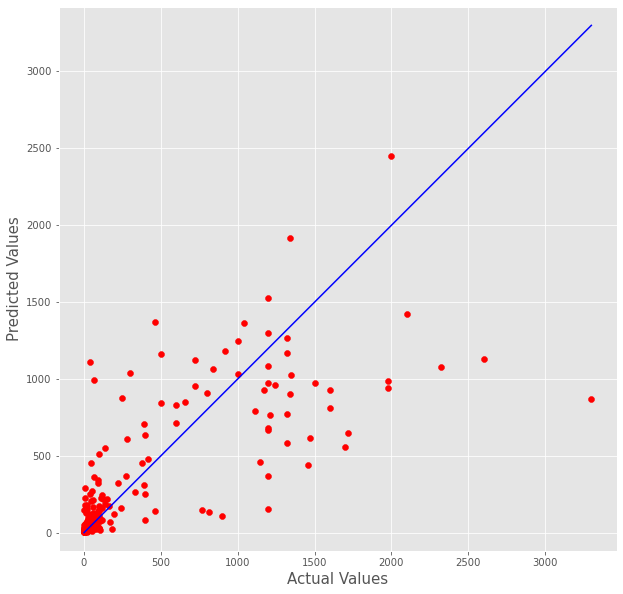

In [137]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_rfr_bm, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(pred_rfr_bm), max(y_test))
p2 = min(min(pred_rfr_bm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

Upon review, found Predicted Value is 56.33% equivalent to Actual Values